In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
df.duplicated().sum() #for duplicated rows

0

0    255027
1    149263
Name: is_duplicate, dtype: int64


0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64




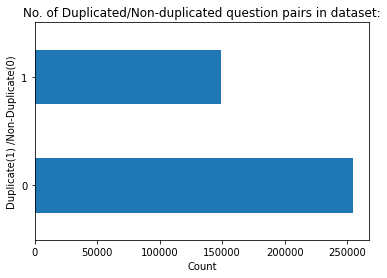

In [6]:
#Distribution of duplicate and non duplicate questions
print(df['is_duplicate'].value_counts())
print('\n')
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
print('\n')
df['is_duplicate'].value_counts().plot(kind='barh');
plt.title('No. of Duplicated/Non-duplicated question pairs in dataset:');
plt.xlabel('Count');
plt.ylabel('Duplicate(1) /Non-Duplicate(0)');

Number of Unique Questions:  537933
Number of Repeated Questions:  111780


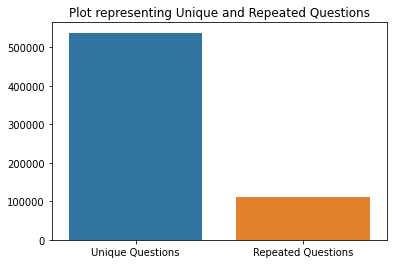

In [7]:
#No. of repeated questions

qid= pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of Unique Questions: ',len(np.unique(qid)))
x= qid.value_counts()>1
print('Number of Repeated Questions: ',len(x[x]))

X=['Unique Questions','Repeated Questions']
Y=[len(np.unique(qid)),len(x[x])]
sns.barplot(x=X,y=Y);
plt.title('Plot representing Unique and Repeated Questions');

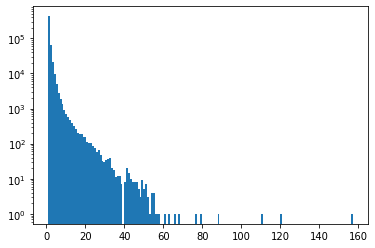

In [8]:
#Repeated QUestions Histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [9]:
text = " ".join(review for review in df.question1.astype(str))

In [10]:
text2= " ".join(review for review in df.question2.astype(str))

In [11]:
stop_words = set(STOPWORDS)
wordcloud1=WordCloud(stopwords=stop_words, background_color="black",width=1000,height=500,collocations=False).generate(text)
wordcloud2=WordCloud(stopwords=stop_words, background_color="black",width=1000,height=500,collocations=False).generate(text2)

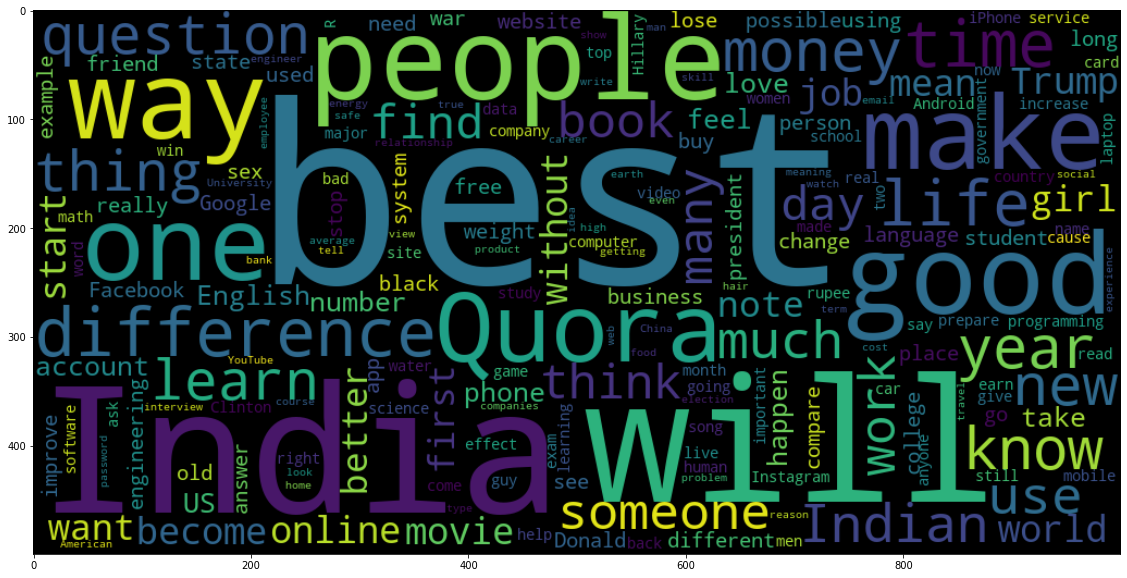

In [12]:
#Common Words in Question1 Column:

plt.figure(figsize=(30,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud1,interpolation='bilinear')
plt.show()

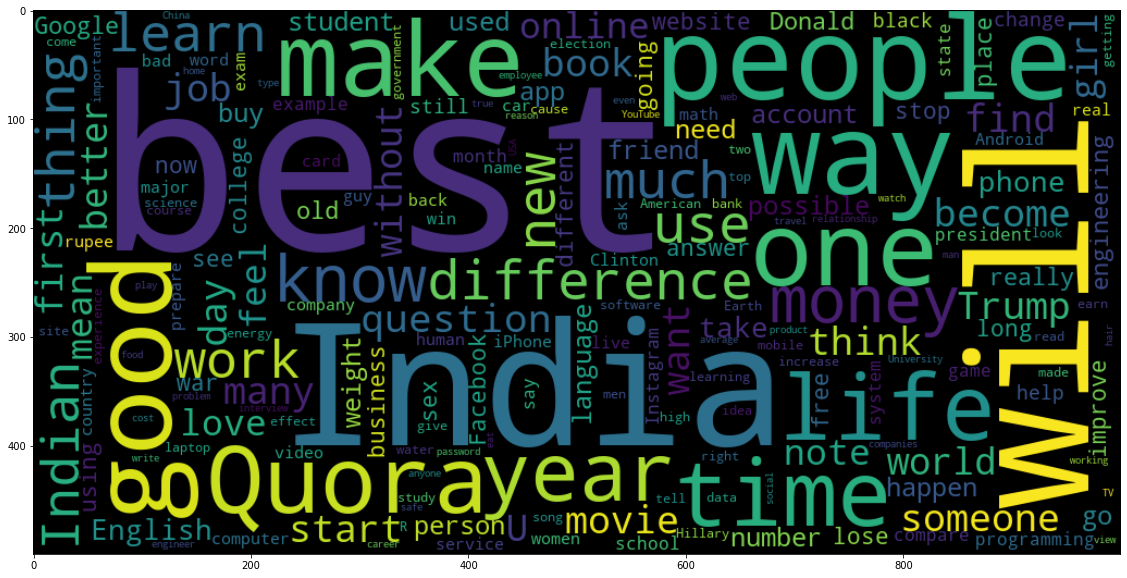

In [13]:
#Common Words in Question2 Column:

plt.figure(figsize=(30,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud2,interpolation='bilinear')
plt.show()